In [1]:
import numpy as  np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df_mnist_train=pd.read_csv("train.csv")

In [3]:
df_mnist_test=pd.read_csv("test.csv")

In [4]:
x_train=df_mnist_train.drop(["label"],axis=1)
y_train=df_mnist_train["label"]

In [5]:
xtrain=x_train.values

In [6]:
b_new=stats.zscore(xtrain, axis=1)

In [7]:
b_new

array([[-0.32863357, -0.32863357, -0.32863357, ..., -0.32863357,
        -0.32863357, -0.32863357],
       [-0.57387931, -0.57387931, -0.57387931, ..., -0.57387931,
        -0.57387931, -0.57387931],
       [-0.2872102 , -0.2872102 , -0.2872102 , ..., -0.2872102 ,
        -0.2872102 , -0.2872102 ],
       ...,
       [-0.4604901 , -0.4604901 , -0.4604901 , ..., -0.4604901 ,
        -0.4604901 , -0.4604901 ],
       [-0.42623803, -0.42623803, -0.42623803, ..., -0.42623803,
        -0.42623803, -0.42623803],
       [-0.36471591, -0.36471591, -0.36471591, ..., -0.36471591,
        -0.36471591, -0.36471591]])

In [10]:
xtrain.shape

(42000, 784)

In [11]:
b_z=np.zeros((42000,784))

for i in range(len(b_new)):
    for j in range(len(b_new[0])):
        if(b_new[i][j] > 0.05):
              b_z[i][j]=xtrain[i][j]
                

In [12]:
y=y_train.values

In [13]:
from sklearn.decomposition import PCA


In [24]:
pca = PCA(n_components=2)
X_r = pca.fit(b_z).transform(b_z)


In [25]:
import matplotlib.pyplot as plt

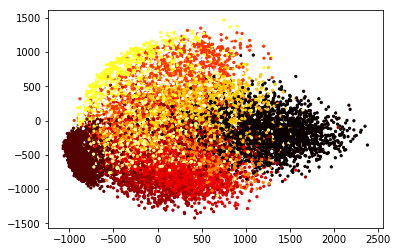

In [26]:

plt.scatter(X_r[:,0],X_r[:,1], s=5,c=y, cmap=plt.cm.hot)
plt.show()
plt.close()

In [27]:
from sklearn import datasets


In [28]:
iris=datasets.load_iris()

In [29]:
x=iris.data[:,:]
y=iris.target

In [34]:
type(y)
y_iris=y

In [49]:
y.shape

(150,)

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
x_new=stats.zscore(x, axis=1)

In [44]:
x_new.shape

(150, 4)

In [73]:
x_z=np.zeros((150,4))

for i in range(len(x_new)):
    for j in range(len(x_new[0])):
        if(x_new[i][j] > 0.2):
              x_z[i][j]=x[i][j]
                

In [74]:
x_z.shape

(150, 4)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_z,y,test_size=0.4)

In [76]:
print(x_train.shape)
print(y_train.shape)

(90, 4)
(90,)


In [77]:
pca = PCA(n_components=2)
X_iris = pca.fit(x_train).transform(x_train)


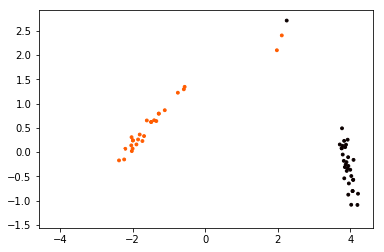

In [78]:

plt.scatter(X_iris[:,0],X_iris[:,1], s=8,c=y_train, cmap=plt.cm.hot)
plt.show()
plt.close()

In [125]:
from sklearn.cluster import KMeans,MiniBatchKMeans
# cluster_num = 3
# kmeans = KMeans(n_clusters=cluster_num)
# iris_clusters=kmeans.fit(x_z)


In [128]:

n_clusters=3

In [129]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(x_z)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


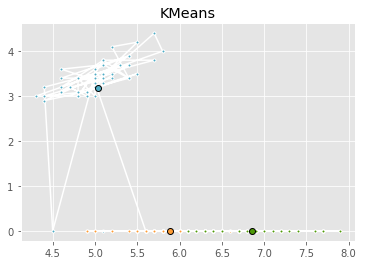

In [131]:
# Plot result

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.figure()
plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(x_z[my_members, 0], x_z[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.show()

In [133]:
y_kmeans = k_means.predict(x_z)


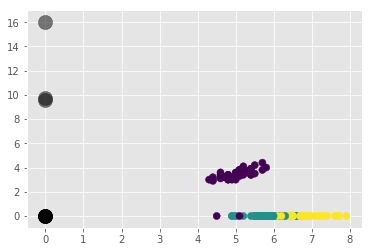

In [138]:
plt.scatter(x_z[:, 0],x_z [:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [ ]:
y_kmeans = k_means.predict(x_z)


In [79]:
from sklearn.datasets import load_boston

In [80]:
boston=datasets.load_boston()

In [81]:
x_boston=boston.data[:,:]
y_boston=boston.target

In [82]:
x_bostonnew=stats.zscore(x_boston, axis=1)

In [83]:
x_bostonnew.shape

(506, 13)

In [93]:
# y_boston

In [94]:
y_boston.shape

(506,)

In [214]:
x_bostonz=np.zeros((506,13))

for i in range(len(x_bostonnew)):
    for j in range(len(x_bostonnew[0])):
        if(x_bostonnew[i][j] > 0.05):
              x_bostonz[i][j]=x_boston[i][j]
                

In [215]:
pca = PCA(n_components=2)
X_boston = pca.fit(x_bostonz).transform(x_bostonz)


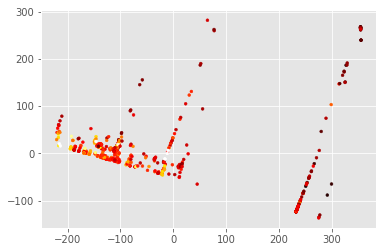

In [216]:

plt.scatter(X_boston[:,0],X_boston[:,1], s=8,c=y_boston, cmap=plt.cm.hot)
plt.show()
plt.close()

In [217]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10)
k_means.fit(x_bostonz)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)


In [218]:
y_kmeans = k_means.predict(x_bostonz)


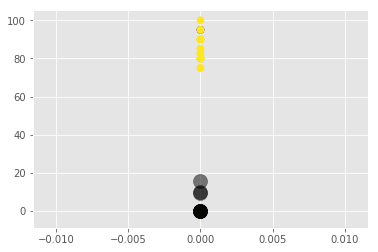

In [219]:
plt.scatter(x_bostonz[:, 0],x_bostonz [:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


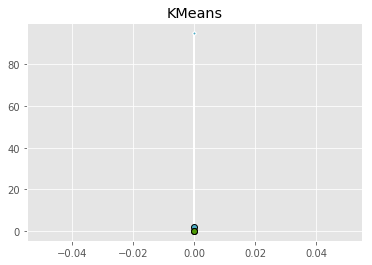

In [220]:
# Plot result

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.figure()
plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(x_bostonz[my_members, 0], x_bostonz[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.show()

In [164]:
import pandas as pd


In [165]:
gene_data=pd.read_csv("C:\gene expression cancer RNA-Seq Data Set - UCI\data.csv")

In [166]:
gene_label=pd.read_csv("C:\gene expression cancer RNA-Seq Data Set - UCI\labels.csv")

In [167]:
gene_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [168]:
gene_label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [169]:
gene_data=gene_data.drop(["Unnamed: 0"],axis=1)

In [176]:
g_data=gene_data.values


In [177]:
g_data.shape

(801, 20531)

In [178]:
g=gene_label["Class"]

In [179]:
g_label=g.values

In [180]:
g_label.shape

(801,)

In [181]:
type(g_label)

numpy.ndarray

In [183]:
# g_label

In [189]:
gene_label.Class = pd.Categorical(pd.factorize(gene_label.Class)[0])
gene_label.head()

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2


In [184]:
gene_new=stats.zscore(g_data, axis=1)

In [190]:
g=gene_label["Class"]

In [191]:
label=g.values

In [185]:
g_datanew=np.zeros((801,20531))

for i in range(len(gene_new)):
    for j in range(len(gene_new[0])):
        if(gene_new[i][j] > 0.05):
              g_datanew[i][j]=g_data[i][j]


In [186]:
pca = PCA(n_components=2)
X_gene = pca.fit(g_datanew).transform(g_datanew)


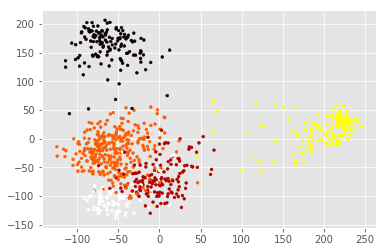

In [192]:

plt.scatter(X_gene[:,0],X_gene[:,1], s=8,c=label, cmap=plt.cm.hot)
plt.show()
plt.close()

In [222]:
pca = PCA(n_components=2)
X_origgene = pca.fit(g_data).transform(g_data)


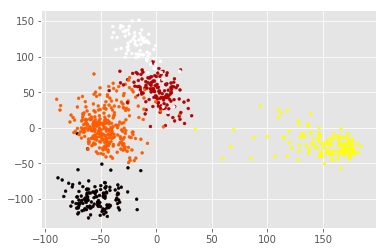

In [223]:

plt.scatter(X_origgene[:,0],X_origgene[:,1], s=8,c=label, cmap=plt.cm.hot)
plt.show()
plt.close()

In [193]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10)
k_means.fit(g_datanew)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)


In [194]:
y_kmeans = k_means.predict(g_datanew)


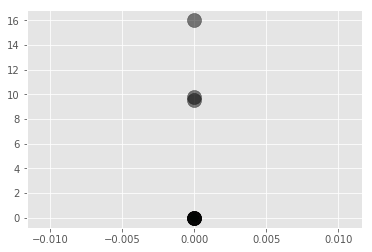

In [201]:
plt.scatter(g_datanew[:, 0],g_datanew[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [202]:
centroids = k_means.cluster_centers_
labels = k_means.labels_


In [203]:
print ("centroids : ")
print( centroids)
print ("labels : ")
print (labels)

centroids : 
[[0.         0.         0.         ... 9.77605078 3.31334142 0.        ]
 [0.         0.         0.         ... 9.43000135 0.91076834 0.        ]
 [0.         0.         0.         ... 9.69678011 2.20569935 0.        ]
 [0.         0.         0.         ... 9.37838284 1.49461206 0.        ]]
labels : 
[2 3 2 2 0 2 1 2 0 2 0 1 2 0 0 0 3 1 1 2 0 1 3 0 1 3 3 0 0 0 0 0 1 0 2 0 1
 3 0 0 1 2 2 1 1 0 2 3 0 3 0 3 0 2 3 0 0 3 1 0 3 0 0 3 2 3 0 2 1 0 1 0 0 3
 0 3 0 1 2 3 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 2 3 0 2 0 0 1 0 1 3 1 3 3 3 3 2
 0 3 2 0 1 1 1 0 0 3 1 3 0 2 2 2 0 1 3 3 0 3 0 0 1 3 0 1 3 0 2 0 1 3 3 2 0
 3 3 3 3 0 0 3 0 0 2 2 3 2 3 1 0 2 3 3 1 3 0 1 3 0 3 0 0 0 2 0 1 3 1 0 2 2
 2 3 3 0 3 3 1 3 2 3 0 0 0 3 3 0 1 1 1 1 2 0 2 0 3 3 0 2 0 2 0 0 0 3 0 1 3
 1 1 3 0 1 2 0 3 3 2 3 0 1 2 1 3 0 1 1 3 2 2 3 3 1 0 0 3 0 2 3 0 2 1 2 2 2
 0 3 3 3 3 3 2 3 0 0 1 1 0 3 2 1 2 0 0 1 0 0 0 0 3 3 0 0 0 1 1 1 1 0 0 0 1
 0 0 3 2 0 0 3 3 2 0 0 0 3 0 2 0 3 3 3 2 1 0 1 1 3 3 1 0 0 0 0 1 0 0 2 0 1
 0 3 2 1 

In [208]:
color = ["g","r","b","k" ]

In [209]:
np.unique(labels)

array([0, 1, 2, 3])

In [210]:
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *


coordinate: [0.         0.         0.         ... 8.92132623 0.         0.        ] label: 2
i :  0
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.39785429 0.         0.        ] label: 3
i :  1
color[labels[i]] :  k
coordinate: [ 0.          0.          0.         ... 10.09046974  0.
  0.        ] label: 2
i :  2
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.68436467 0.         0.        ] label: 2
i :  3
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.46119088 0.         0.        ] label: 0
i :  4
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.83647332 0.         0.        ] label: 2
i :  5
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.24421873 8.3309124  0.        ] label: 1
i :  6
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.21687194 0.         0.        ] label: 2
i :  7
color[labels[i]] :  b
coordinate: [ 0.         

i :  100
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.78354342 0.         0.        ] label: 1
i :  101
color[labels[i]] :  r
coordinate: [ 0.          0.          0.         ... 10.17624796  6.94138806
  0.        ] label: 0
i :  102
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.55081988 0.         0.        ] label: 1
i :  103
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.27068544 0.         0.        ] label: 3
i :  104
color[labels[i]] :  k
coordinate: [0.        0.        0.        ... 9.6913021 0.        0.       ] label: 1
i :  105
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.53711549 0.         0.        ] label: 3
i :  106
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 8.64244888 0.         0.        ] label: 3
i :  107
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 8.84422557 0.         0.        ] label: 3
i :  10

  0.        ] label: 0
i :  195
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 7.86453285 0.         0.        ] label: 0
i :  196
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 11.07764357  0.
  0.        ] label: 0
i :  197
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.49639644 0.         0.        ] label: 3
i :  198
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 8.38466289 0.         0.        ] label: 3
i :  199
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.42862189 7.27685022 0.        ] label: 0
i :  200
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.89153159 0.         0.        ] label: 1
i :  201
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 8.95464999 0.         0.        ] label: 1
i :  202
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.68722344 0.         0.     

coordinate: [0.         0.         0.         ... 9.81024064 0.         0.        ] label: 3
i :  320
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.48952086 0.         0.        ] label: 3
i :  321
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.06426313 0.         0.        ] label: 1
i :  322
color[labels[i]] :  r
coordinate: [ 0.          0.          0.         ... 10.4046094   8.77834658
  0.        ] label: 0
i :  323
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.1438041   6.63468764
  0.        ] label: 0
i :  324
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.33991679  0.
  0.        ] label: 0
i :  325
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.30576537  6.83034407
  0.        ] label: 0
i :  326
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.27371402 0.         0.        ] label: 1
i :  327
color[labe

coordinate: [0.         0.         0.         ... 8.35910822 0.         0.        ] label: 3
i :  431
color[labels[i]] :  k
coordinate: [ 0.          0.          0.         ... 10.79337571  0.
  0.        ] label: 0
i :  432
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 8.75835315 0.         0.        ] label: 2
i :  433
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.79695946 0.         0.        ] label: 3
i :  434
color[labels[i]] :  k
coordinate: [ 0.          0.          0.         ... 10.02350487  0.
  0.        ] label: 1
i :  435
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.48033784 0.         0.        ] label: 0
i :  436
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ...  9.41620429 10.50177749
  0.        ] label: 0
i :  437
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.19352536 0.         0.        ] label: 1
i :  438
color[labels[i]] :  r
coo

coordinate: [0.         0.         0.         ... 9.71483106 7.1633679  0.        ] label: 2
i :  517
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 9.32086823 9.07165274 0.        ] label: 3
i :  518
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.64167788 0.         0.        ] label: 2
i :  519
color[labels[i]] :  b
coordinate: [0.         0.         0.         ... 8.78908691 0.         0.        ] label: 0
i :  520
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.91788819 0.         0.        ] label: 1
i :  521
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.48211013 0.         0.        ] label: 0
i :  522
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.54416658 7.85018684 0.        ] label: 1
i :  523
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.24682846 0.         0.        ] label: 1
i :  524
color[labels[i]] :  r
coordina

  0.        ] label: 0
i :  632
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 7.95441735 0.         0.        ] label: 0
i :  633
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.65204724 0.         0.        ] label: 3
i :  634
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.28356763 0.         0.        ] label: 3
i :  635
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.2095021  7.12014455 0.        ] label: 3
i :  636
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.41785673 9.47373416 0.        ] label: 0
i :  637
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.22861429  0.
  0.        ] label: 0
i :  638
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.29383946  0.
  0.        ] label: 0
i :  639
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.69438749 6.89813578 0.      

coordinate: [0.         0.         0.         ... 9.84208472 0.         0.        ] label: 0
i :  734
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 8.69619556 7.68411741 0.        ] label: 0
i :  735
color[labels[i]] :  g
coordinate: [0.         0.         0.         ... 9.41974534 0.         0.        ] label: 1
i :  736
color[labels[i]] :  r
coordinate: [0.         0.         0.         ... 9.5198721  8.50357931 0.        ] label: 0
i :  737
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 11.0493653   7.73378817
  0.        ] label: 3
i :  738
color[labels[i]] :  k
coordinate: [0.         0.         0.         ... 9.52215386 0.         0.        ] label: 0
i :  739
color[labels[i]] :  g
coordinate: [0.        0.        0.        ... 8.7937561 0.        0.       ] label: 0
i :  740
color[labels[i]] :  g
coordinate: [ 0.          0.          0.         ... 10.34570462  0.
  0.        ] label: 2
i :  741
color[labels[i]] :  b
coordina

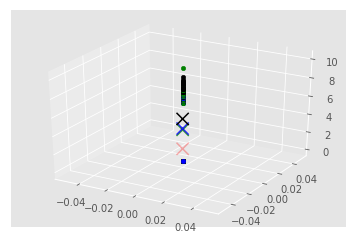

In [211]:
c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')


for i in range(len(g_datanew)):
    print("coordinate:",g_datanew[i], "label:", labels[i])
    print ("i : ",i)
    print ("color[labels[i]] : ",color[labels[i]])
    ax.scatter(g_datanew[i][1], g_datanew[i][2], g_datanew[i][3], c=color[labels[i]])


for cluster_number in range(cluster_num):
  print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 1],centroids[:, 2], centroids[:, 3], marker = "x", s=150, linewidths = 5, c=color)

plt.show()


In [232]:
# spellman_data=pd.read_csv("C:\Spellman.csv")

In [233]:
# spellman_data.head()